In [1]:
'''
0、id、int行の通し番号
1、age、int、年齢
2、job、varchar、職種
3、marital、varchar、未婚/既婚
4、education、varchar、教育水準
5、default、varchar、債務不履行があるか（yes, no）
6、balance、int、年間平均残高（€）
7、housing、varchar、住宅ローン（yes, no）
8、loan、varchar、個人ローン（yes, no）
9、contact、varchar、連絡方法
10、dayint、最終接触日
11、monthchar、最終接触月
12、duration、int、最終接触時間（秒）
13、compaign、int、現キャンペーンにおける接触回数
14、pdaysint、経過日数：前キャンペーン接触後の日数
15、previous、int、接触実績：現キャンペーン以前までに顧客に接触した回数
16、poutcome、varchar、前回のキャンペーンの成果
17、y、boolean、定額預金申し込み有無（1:有り, 0:無し）
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/submit_sample.csv", header=None)

In [3]:
train.head(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1


In [4]:
test.head(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown


In [5]:
sample.head(3)

,0,1
0,1,0.236
1,2,0.128
2,3,0.903


In [6]:
print(train.shape)
print(test.shape)
print(sample.shape)

(27128, 18)
(18083, 17)
(18083, 2)


In [7]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [8]:
test.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,9042.000000,40.914008,1371.980092,15.806725,254.340264,2.781950,39.702428,0.581209
std,5220.256794,10.634331,3105.985293,8.299509,253.591981,3.054651,99.747634,1.965265
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,4521.500000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,9042.000000,39.000000,447.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,13562.500000,48.000000,1427.000000,21.000000,314.000000,3.000000,-1.000000,0.000000
max,18083.000000,95.000000,98417.000000,31.000000,3881.000000,50.000000,854.000000,58.000000


In [9]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [11]:
#定額預金申し込み有無(1:有り、0:無し)
train["y"].value_counts()

0    23954
1     3174
Name: y, dtype: int64

In [12]:
pd.crosstab(train["marital"], train["y"], margins=True)

y,0,1,All
marital,,,
divorced,2691,364,3055
married,14744,1667,16411
single,6519,1143,7662
All,23954,3174,27128


In [13]:
train["age"].describe()

count    27128.000000
mean        40.951010
std         10.608542
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [14]:
age_bining = pd.cut(train["age"],[0, 20, 30, 40, 50, 60, 100])

In [15]:
age_bining

0         (30, 40]
1         (50, 60]
2         (30, 40]
3        (60, 100]
4         (30, 40]
           ...    
27123     (40, 50]
27124     (30, 40]
27125     (30, 40]
27126     (30, 40]
27127     (20, 30]
Name: age, Length: 27128, dtype: category
Categories (6, interval[int64, right]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [16]:
pd.crosstab(age_bining, train["y"], margins=True)

y,0,1,All
age,,,
"(0, 20]",39,21,60
"(20, 30]",3486,655,4141
"(30, 40]",9488,1111,10599
"(40, 50]",6117,602,6719
"(50, 60]",4416,488,4904
"(60, 100]",408,297,705
All,23954,3174,27128


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18083 entries, 0 to 18082
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         18083 non-null  int64 
 1   age        18083 non-null  int64 
 2   job        18083 non-null  object
 3   marital    18083 non-null  object
 4   education  18083 non-null  object
 5   default    18083 non-null  object
 6   balance    18083 non-null  int64 
 7   housing    18083 non-null  object
 8   loan       18083 non-null  object
 9   contact    18083 non-null  object
 10  day        18083 non-null  int64 
 11  month      18083 non-null  object
 12  duration   18083 non-null  int64 
 13  campaign   18083 non-null  int64 
 14  pdays      18083 non-null  int64 
 15  previous   18083 non-null  int64 
 16  poutcome   18083 non-null  object
dtypes: int64(8), object(9)
memory usage: 2.3+ MB


In [19]:
pout = pd.crosstab(train["poutcome"],train["y"], margins=True)

In [20]:
pout

y,0,1,All
poutcome,,,
failure,2578,391,2969
other,950,173,1123
success,312,574,886
unknown,20114,2036,22150
All,23954,3174,27128


In [21]:
pout["rate"] = pout[1] / pout["All"]

In [22]:
pout

y,0,1,All,rate
poutcome,,,,
failure,2578,391,2969,0.131694
other,950,173,1123,0.154052
success,312,574,886,0.647856
unknown,20114,2036,22150,0.091919
All,23954,3174,27128,0.117001


In [23]:
train["duration"].describe()

count    27128.000000
mean       260.711295
std        260.091727
min          0.000000
25%        104.000000
50%        182.000000
75%        323.000000
max       4918.000000
Name: duration, dtype: float64

In [24]:
duration_bining = pd.cut(train["duration"], [-1,100,200,300,400,500,600,700,800,900,1000,5000])

In [25]:
duration_bining

0        (900, 1000]
1         (100, 200]
2         (500, 600]
3         (400, 500]
4         (500, 600]
            ...     
27123     (200, 300]
27124     (300, 400]
27125     (400, 500]
27126      (-1, 100]
27127     (100, 200]
Name: duration, Length: 27128, dtype: category
Categories (11, interval[int64, right]): [(-1, 100] < (100, 200] < (200, 300] < (300, 400] ... (700, 800] < (800, 900] < (900, 1000] < (1000, 5000]]

In [26]:
dura = pd.crosstab(duration_bining, train["y"], margins=True)

In [27]:
dura

y,0,1,All
duration,,,
"(-1, 100]",6379,60,6439
"(100, 200]",7909,450,8359
"(200, 300]",4286,557,4843
"(300, 400]",2258,408,2666
"(400, 500]",1231,308,1539
"(500, 600]",699,270,969
"(600, 700]",441,259,700
"(700, 800]",245,189,434
"(800, 900]",149,153,302


In [28]:
dura["rate"] = dura[1] / dura["All"]

In [29]:
dura

y,0,1,All,rate
duration,,,,
"(-1, 100]",6379,60,6439,0.009318
"(100, 200]",7909,450,8359,0.053834
"(200, 300]",4286,557,4843,0.115011
"(300, 400]",2258,408,2666,0.153038
"(400, 500]",1231,308,1539,0.200130
"(500, 600]",699,270,969,0.278638
"(600, 700]",441,259,700,0.370000
"(700, 800]",245,189,434,0.435484
"(800, 900]",149,153,302,0.506623


In [30]:
trainX = train.iloc[:, :17]

In [31]:
trainX.head(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure


In [32]:
y = train["y"]

In [33]:
testX = test.copy()

In [34]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [35]:
model = DTC(max_depth=2, min_samples_leaf=500)

In [36]:
model.fit(trainX, y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=500)

[Text(0.5, 0.8333333333333334, 'duration <= 521.5\ngini = 0.207\nsamples = 27128\nvalue = [23954, 3174]\nclass = y[0]'),
 Text(0.25, 0.5, 'poutcome_success <= 0.5\ngini = 0.141\nsamples = 24097\nvalue = [22262, 1835]\nclass = y[0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.11\nsamples = 23343\nvalue = [21974, 1369]\nclass = y[0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.472\nsamples = 754\nvalue = [288, 466]\nclass = y[1]'),
 Text(0.75, 0.5, 'duration <= 835.5\ngini = 0.493\nsamples = 3031\nvalue = [1692, 1339]\nclass = y[0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.463\nsamples = 1958\nvalue = [1246, 712]\nclass = y[0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.486\nsamples = 1073\nvalue = [446, 627]\nclass = y[1]')]

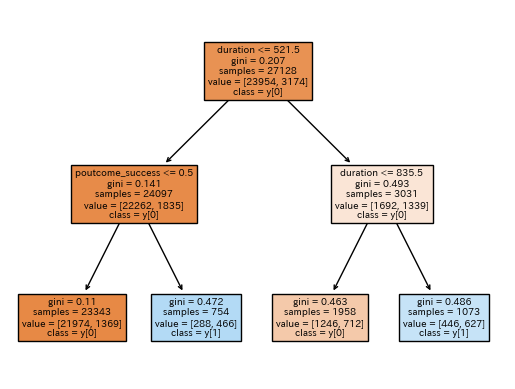

In [37]:
plot_tree(model, feature_names=trainX.columns, class_names=True, filled=True)

In [38]:
pred = model.predict_proba(testX)

In [39]:
pred

array([[0.41565704, 0.58434296],
       [0.41565704, 0.58434296],
       [0.94135287, 0.05864713],
       ...,
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713]])

In [40]:
pred = pred[:, 1]

In [41]:
pred

array([0.58434296, 0.58434296, 0.05864713, ..., 0.05864713, 0.05864713,
       0.05864713])

In [42]:
sample[1] = pred

In [43]:
sample.to_csv("submit1_bank.csv", index=None, header=None)

In [55]:
model2 = DTC(max_depth=10, min_samples_leaf=500)

In [56]:
model2.fit(trainX, y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=500)

[Text(0.7364386792452831, 0.9444444444444444, 'duration <= 521.5\ngini = 0.207\nsamples = 27128\nvalue = [23954, 3174]\nclass = y[0]'),
 Text(0.5483490566037735, 0.8333333333333334, 'poutcome_success <= 0.5\ngini = 0.141\nsamples = 24097\nvalue = [22262, 1835]\nclass = y[0]'),
 Text(0.5294811320754716, 0.7222222222222222, 'duration <= 206.5\ngini = 0.11\nsamples = 23343\nvalue = [21974, 1369]\nclass = y[0]'),
 Text(0.3136792452830189, 0.6111111111111112, 'duration <= 111.5\ngini = 0.053\nsamples = 14866\nvalue = [14460, 406]\nclass = y[0]'),
 Text(0.19339622641509435, 0.5, 'duration <= 90.5\ngini = 0.019\nsamples = 7403\nvalue = [7333, 70]\nclass = y[0]'),
 Text(0.12264150943396226, 0.3888888888888889, 'duration <= 74.5\ngini = 0.01\nsamples = 5476\nvalue = [5448, 28]\nclass = y[0]'),
 Text(0.07547169811320754, 0.2777777777777778, 'marital_single <= 0.5\ngini = 0.006\nsamples = 3976\nvalue = [3965, 11]\nclass = y[0]'),
 Text(0.03773584905660377, 0.16666666666666666, 'day <= 11.5\ngini 

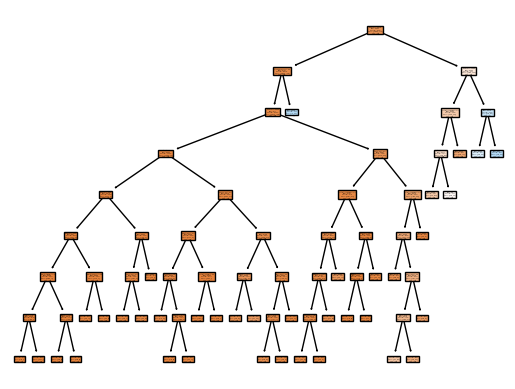

In [58]:
plot_tree(model2, feature_names=trainX.columns, class_names=True, filled=True)

In [59]:
pred2 = model2.predict_proba(testX)

In [60]:
pred2 = pred2[:, 1]

In [61]:
pred2

array([0.62151394, 0.55166375, 0.00328947, ..., 0.00382166, 0.00977654,
       0.04737733])

In [62]:
sample[1] = pred2

In [63]:
sample.to_csv("submit2_bank.csv", index=None, header=None)

In [54]:
cross_validate(model, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.04598188, 0.0487988 , 0.07911825, 0.04705   , 0.07786202]),
 'score_time': array([0.00532413, 0.00560617, 0.00649691, 0.00720263, 0.00711584]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162494, 0.746135  ])}

In [64]:
cross_validate(model2, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.17899704, 0.17664003, 0.16778493, 0.17053914, 0.16069722]),
 'score_time': array([0.01862311, 0.02309489, 0.01601195, 0.01700401, 0.01480484]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.8924153 , 0.88343681]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.8876343 , 0.885615  ])}

In [65]:
model3 = DTC()

In [66]:
parameters={"max_depth":[2,3,4,5,6,7,8,9,10]}

In [67]:
parameters={"max_depth":list(range(2,11))}

In [68]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [69]:
gcv = GridSearchCV(model3, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [72]:
gcv.cv_results_

{'mean_fit_time': array([0.09696503, 0.10084929, 0.12512598, 0.14037824, 0.14865694,
        0.17226877, 0.17974973, 0.1634438 , 0.17587543]),
 'std_fit_time': array([0.00786349, 0.02392678, 0.01769358, 0.01379126, 0.00456627,
        0.01282608, 0.01132145, 0.01276756, 0.00740597]),
 'mean_score_time': array([0.0114634 , 0.00975385, 0.00936332, 0.00994315, 0.00841055,
        0.01297245, 0.00755997, 0.00682054, 0.00588331]),
 'std_score_time': array([0.00279876, 0.00139736, 0.00149333, 0.00229108, 0.0007476 ,
        0.0042245 , 0.00104205, 0.00063005, 0.00048604]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

In [73]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

In [74]:
train_score

array([0.74831988, 0.8124462 , 0.84413528, 0.85725834, 0.86924146,
       0.88600411, 0.89890594, 0.91014818, 0.92420504])

In [75]:
test_score

array([0.74715097, 0.80745683, 0.81411275, 0.82270119, 0.82740557,
       0.82703412, 0.81775827, 0.79416902, 0.77343494])

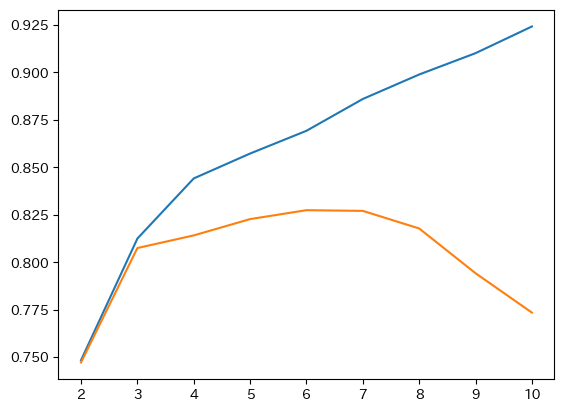

In [77]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0,1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9,10])
plt.show()

In [78]:
gcv.best_params_

{'max_depth': 6}

In [79]:
pred = gcv.predict_proba(testX)

In [80]:
pred

array([[0.3390411 , 0.6609589 ],
       [0.54751131, 0.45248869],
       [0.98031963, 0.01968037],
       ...,
       [0.98031963, 0.01968037],
       [0.98031963, 0.01968037],
       [0.98031963, 0.01968037]])

In [81]:
pred = pred[:, 1]

In [82]:
pred

array([0.6609589 , 0.45248869, 0.01968037, ..., 0.01968037, 0.01968037,
       0.01968037])

In [83]:
sample[1] = pred

In [84]:
sample.to_csv("submit3_bank.csv", index=None, header=None)

In [85]:
model4 = DTC()

In [89]:
parameters2 = {"max_depth":list(range(2, 11)), 
               "min_samples_leaf":[5, 10, 20, 50, 100, 500]}

In [90]:
gcv2 = GridSearchCV(model4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

In [91]:
gcv2.fit(trainX, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [92]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

In [93]:
pred2 = gcv2.predict_proba(testX)

In [94]:
pred2 = pred2[:, 1]

In [95]:
pred2

array([0.81355932, 0.58333333, 0.01083477, ..., 0.01083477, 0.01083477,
       0.01083477])

In [96]:
sample[1] = pred2

In [97]:
sample.to_csv("submit4_bank.csv", index=None, header=None)